In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
library(DBI)
library(dbplyr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# <span style="font-family:Papyrus; font-size:4em;">Title</span>

## Introduction  
1). background information  
2). the question we will ask (one and one only)  
3). identify and describe the **data set** we will use to answer the quetsion  

In [3]:
atp_data_frame <- read_csv("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn")
head(atp_data_frame)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275


In [9]:
## here is all my work for analysis, most of them are abandoned, I just leave them here in case.

# draft1.1
# data_break_point <- atp_data_frame %>%
#     filter(surface == "Hard" ,tourney_level == "G", draw_size == 128) %>%
#     select(minutes,w_bpSaved,w_bpFaced,winner_rank_points,l_bpSaved,l_bpFaced,loser_rank_points,winner_age, loser_age, ) %>%
#     mutate(w_bd_save_pr = w_bpSaved/w_bpFaced,l_bd_save_pr = l_bpSaved/l_bpFaced)
# data_break_point

# data_break_plot <- data_break_point %>%
#     ggplot(aes(x = winner_rank_points, y = w_bd_save_pr)) +
#     geom_point() +
#     labs(x = "rank point" , y = "proportion of save break points") +
#     theme( text = element_text(size = 20))
# data_break_plot


# draft1.2
# data_break_point <- atp_data_frame %>%
#     filter(surface == "Hard",tourney_level == "G",draw_size == 128) %>%
#     select(tourney_name,minutes,w_bpSaved,w_bpFaced,winner_rank_points,l_bpSaved,l_bpFaced,loser_rank_points,winner_age, loser_age, winner_ht,winner_rank,loser_rank) %>%
#     mutate(w_bd_save_pr = w_bpSaved/w_bpFaced,l_bd_save_pr = l_bpSaved/l_bpFaced)
# data_break_point

# data_break_plot <- data_break_point %>%
#     ggplot(aes(x = minutes, y = w_bpSaved)) +
#     geom_point(aes(colour = tourney_name)) +
#     labs(x = "minutes" , y = "winner save break points number", colour ="tourney name") +
#     theme( text = element_text(size = 20))
# data_break_plot



# draft1.3
# data_break_point <- atp_data_frame %>%
#     filter(winner_hand == "R", loser_hand == "R",tourney_level == "G") %>%
#     select(tourney_name,minutes,w_bpSaved,w_bpFaced,winner_rank_points,l_bpSaved,l_bpFaced,loser_rank_points,winner_age, loser_age, winner_ht,winner_rank,loser_rank) %>%
#     mutate(w_bd_save_pr = w_bpSaved/w_bpFaced,l_bd_save_pr = l_bpSaved/l_bpFaced)
# data_break_point

# data_break_plot <- data_break_point %>%
#     ggplot(aes(x = minutes, y = w_bpSaved)) +
#     geom_point(aes(colour = tourney_name)) +
#     labs(x = "minutes" , y = "winner save break points number", colour ="tourney name") +
#     theme( text = element_text(size = 20))
# data_break_plot


# draft1.4
# data_break_point <- atp_data_frame %>%
#     filter(surface == "Hard",tourney_level == "G",draw_size == 128) %>%
#     select(tourney_name,minutes,w_bpSaved,w_bpFaced,winner_rank_points,l_bpSaved,l_bpFaced,loser_rank_points,winner_age, loser_age, winner_ht,winner_rank,loser_rank) %>%
#     mutate(w_bd_save_pr = w_bpSaved/w_bpFaced,l_bd_save_pr = l_bpSaved/l_bpFaced)
# data_break_point

# data_break_plot <- data_break_point %>%
#     ggplot(aes(x = minutes, y = w_bpSaved)) +
#     geom_point(aes(colour = tourney_name)) +
#     labs(x = "minutes" , y = "winner save break points number", colour ="tourney name") +
#     theme( text = element_text(size = 20))
# data_break_plot


# draft2.1
# data_filtered <- atp_data_frame %>%
#     filter(tourney_level == "G")
# hi_ace_wins = nrow(filter(atp_data_frame, w_ace > l_ace))
# lo_ace_wins = nrow(filter(atp_data_frame, w_ace < l_ace))
# total_win = hi_ace_wins + lo_ace_wins
# hi_ace_win_pct = hi_ace_wins/total_win
# hi_ace_win_pct



# data_second_serve_pct <-atp_data_frame %>%
#     filter(tourney_level == "G") %>%
#     mutate(second_serve_win_pct_winner = w_2ndWon / w_svpt, second_serve_win_pct_loser = l_2ndWon / l_svpt)
# hi_ssw_wins = nrow(filter(data_second_serve_pct, second_serve_win_pct_winner > second_serve_win_pct_loser))
# lo_ssw_wins = nrow(filter(data_second_serve_pct, second_serve_win_pct_winner < second_serve_win_pct_loser))
# total_win = hi_ssw_wins + lo_ssw_wins
# hi_ssw_win_pct = hi_ssw_wins/total_win
# hi_ssw_win_pct


# data_break_plot <- data_break_point %>%
#     ggplot(aes(x = minutes, y = proportion)) +
#     geom_point(aes(colour = state)) +
#     labs(x = "match length(min)" , y = "proportion of save break points", colour = "win/lose") +
#     theme( text = element_text(size = 20))
# data_break_plot

# data_break_point <- atp_data_frame %>%
#     filter(tourney_level == "G") %>%
#     select(minutes,w_bpSaved,w_bpFaced,winner_rank_points,l_bpSaved,l_bpFaced,loser_rank_points,winner_age, loser_age,winner_ht,loser_ht,w_2ndWon,w_svpt,l_2ndWon,l_svpt) %>%
#     mutate(winner = w_bpSaved/w_bpFaced, loser = l_bpSaved/l_bpFaced,second_serve_win_pct_winner = w_2ndWon / w_svpt, second_serve_win_pct_loser = l_2ndWon / l_svpt) %>%
#     pivot_longer(cols = winner:loser,
#                 names_to = "state",
#                 values_to = "break_point_proportion")
# data_break_point

# data_second_serve_pct <-atp_data_frame %>%
#     filter(tourney_level == "G") %>%
#     mutate(second_serve_win_pct_winner = w_2ndWon / w_svpt, second_serve_win_pct_loser = l_2ndWon / l_svpt)
# hi_ssw_wins = nrow(filter(data_second_serve_pct, second_serve_win_pct_winner > second_serve_win_pct_loser))
# lo_ssw_wins = nrow(filter(data_second_serve_pct, second_serve_win_pct_winner < second_serve_win_pct_loser))
# total_win = hi_ssw_wins + lo_ssw_wins
# hi_ssw_win_pct = hi_ssw_wins/total_win
# hi_ssw_win_pct

# stat_matter <- atp_data_frame %>%
#     filter(tourney_level == "G") %>%
#     select(minutes,w_bpSaved,w_bpFaced,winner_rank_points,l_bpSaved,l_bpFaced,loser_rank_points,winner_age, loser_age,winner_ht,loser_ht,w_2ndWon,w_svpt,l_2ndWon,l_svpt,w_ace,l_ace,w_df,l_df) %>%
#     mutate(
#            winner_breakpoint_saved_pct = w_bpSaved/w_bpFaced, 
#            loser_breakpoint_saved_pct = l_bpSaved/l_bpFaced, 
#            winner_second_serve_win_pct = w_2ndWon / w_svpt, 
#            loser_second_serve_win_pct = l_2ndWon / l_svpt,
#            winner_df_pct = w_df / w_svpt,
#            loser_df_pct = l_df / l_svpt) %>%
#     select(winner_rank_points,loser_rank_points,winner_age,loser_age,winner_ht,loser_ht,winner_breakpoint_saved_pct,loser_breakpoint_saved_pct,winner_second_serve_win_pct,loser_second_serve_win_pct,winner_df_pct,loser_df_pct) %>%
#     drop_na() %>%
#     pivot_longer(cols = winner_rank_points:loser_df_pct,
#     names_to = c( "status", ".value"), 
#     names_sep = "_")
# colnames(stat_matter) <- c("status","rank_point","player_age","player_height","breakpoint_saving_rate","second_serve_win_rate","double_fault_rate")
# stat_matter

# stat_matter <- atp_data_frame %>%
#     filter(tourney_level == "G") %>%
#     select(minutes,w_bpSaved,w_bpFaced,winner_rank,l_bpSaved,l_bpFaced,loser_rank,winner_age, loser_age,winner_ht,loser_ht,w_2ndWon,w_svpt,l_2ndWon,l_svpt,w_ace,l_ace,w_df,l_df) %>%
#     mutate(
#            winner_breakpoint_saved_pct = w_bpSaved/w_bpFaced, 
#            loser_breakpoint_saved_pct = l_bpSaved/l_bpFaced, 
#            winner_second_serve_win_pct = w_2ndWon / w_svpt, 
#            loser_second_serve_win_pct = l_2ndWon / l_svpt,
#            winner_df_pct = w_df / w_svpt,
#            loser_df_pct = l_df / l_svpt) %>%
#     select(winner_rank,loser_rank,winner_age,loser_age,winner_ht,loser_ht,winner_breakpoint_saved_pct,loser_breakpoint_saved_pct,winner_second_serve_win_pct,loser_second_serve_win_pct,winner_df_pct,loser_df_pct) %>%
#     drop_na() %>%
#     pivot_longer(cols = winner_rank:loser_df_pct,
#     names_to = c( "status", ".value"), 
#     names_sep = "_") %>%
#     filter(breakpoint > 0)
# colnames(stat_matter) <- c("status","rank","player_age","player_height","breakpoint_saving_rate","second_serve_win_rate","double_fault_rate")
# stat_matter


stat_matter <- atp_data_frame %>%
    filter(tourney_level == "G") %>%
    select(minutes,w_bpSaved,w_bpFaced,winner_rank_points,l_bpSaved,l_bpFaced,loser_rank_points,winner_age, loser_age,winner_ht,loser_ht,w_2ndWon,w_svpt,l_2ndWon,l_svpt,w_ace,l_ace,w_df,l_df,w_1stWon,w_1stIn,l_1stWon,l_1stIn) %>%
    mutate(
           winner_breakpoint_saved_pct = w_bpSaved/w_bpFaced, 
           loser_breakpoint_saved_pct = l_bpSaved/l_bpFaced, 
           winner_second_serve_win_pct = w_2ndWon / w_svpt, 
           loser_second_serve_win_pct = l_2ndWon / l_svpt,
           winner_df_pct = w_df / w_svpt,
           loser_df_pct = l_df / l_svpt,
           winner_1st_serve_pct = w_1stWon / w_1stIn, 
           loser_1st_serve_pct = l_1stWon / l_1stIn) %>%
    select(winner_rank_points,loser_rank_points,winner_age,loser_age,winner_ht,loser_ht,winner_breakpoint_saved_pct,loser_breakpoint_saved_pct,winner_second_serve_win_pct,loser_second_serve_win_pct,winner_df_pct,loser_df_pct,winner_1st_serve_pct,loser_1st_serve_pct) %>%
    drop_na() %>%
    pivot_longer(cols = winner_rank_points:loser_1st_serve_pct,
    names_to = c( "status", ".value"), 
    names_sep = "_")
colnames(stat_matter) <- c("status","rank_point","player_age","player_height","breakpoint_saving_rate","second_serve_win_rate","double_fault_rate","first_serve_win_rate")
stat_matter


Warning message:
“Expected 2 pieces. Additional pieces discarded in 10 rows [1, 2, 7, 8, 9, 10, 11, 12, 13, 14].”


status,rank_point,player_age,player_height,breakpoint_saving_rate,second_serve_win_rate,double_fault_rate,first_serve_win_rate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
winner,823,28.24367,193,0.8000000,0.1704545,0.034090909,0.8867925
loser,525,32.75838,190,0.0000000,0.1710526,0.039473684,0.7555556
winner,1017,29.79329,185,0.6923077,0.1864407,0.005649718,0.7058824
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
loser,1460,28.92813,198,0.5384615,0.09473684,0.042105263,0.7142857
winner,1360,31.27995,203,0.5000000,0.20388350,0.009708738,0.8309859
loser,2225,26.13005,188,0.7142857,0.15277778,0.013888889,0.6372549


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



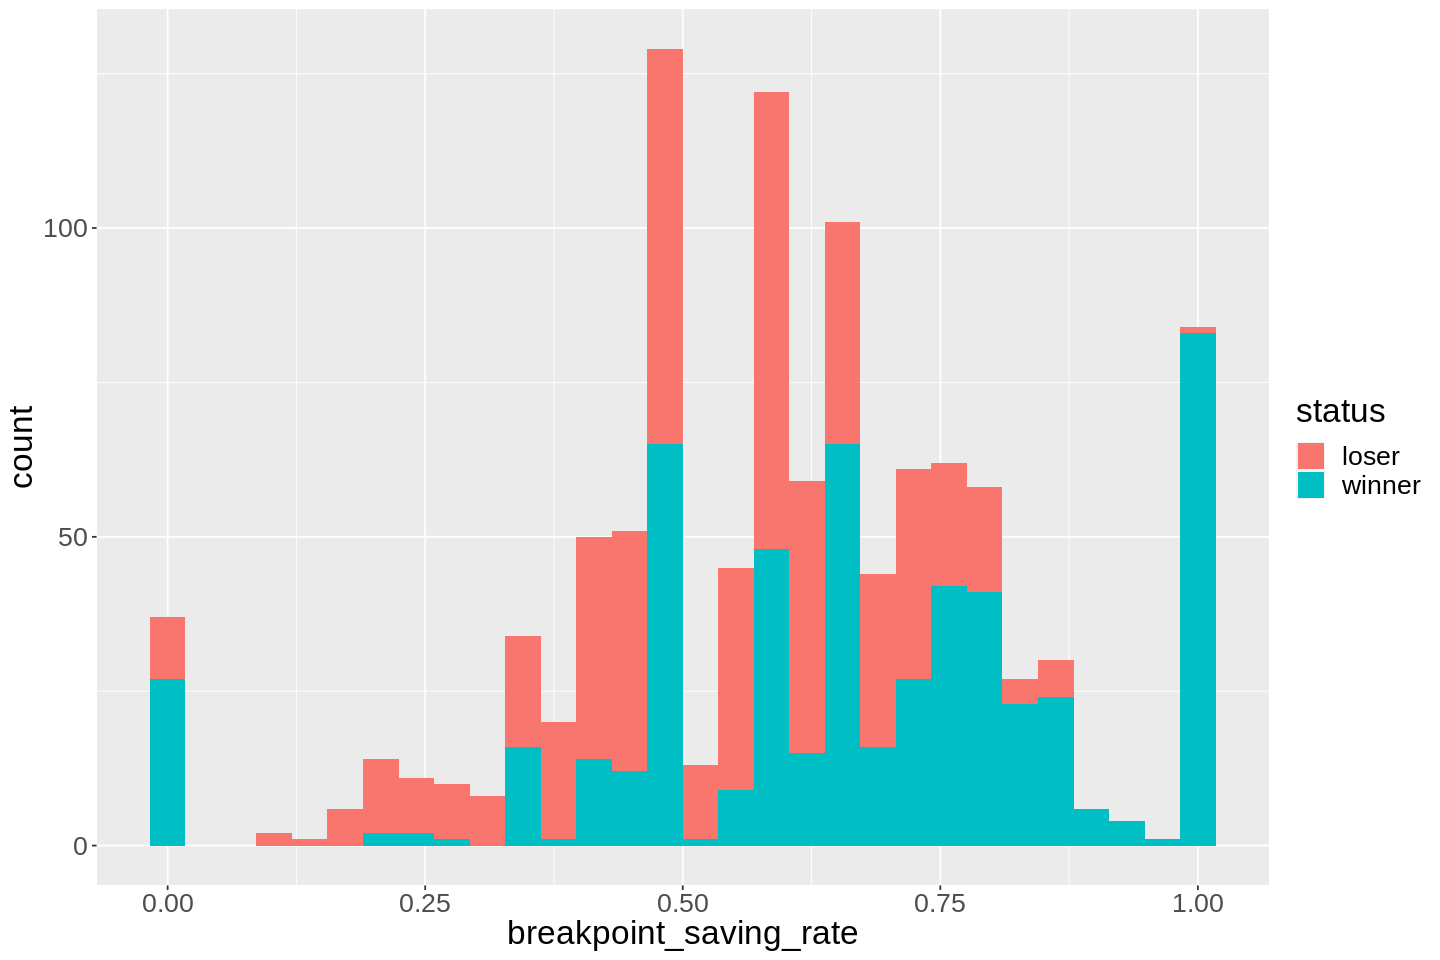

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



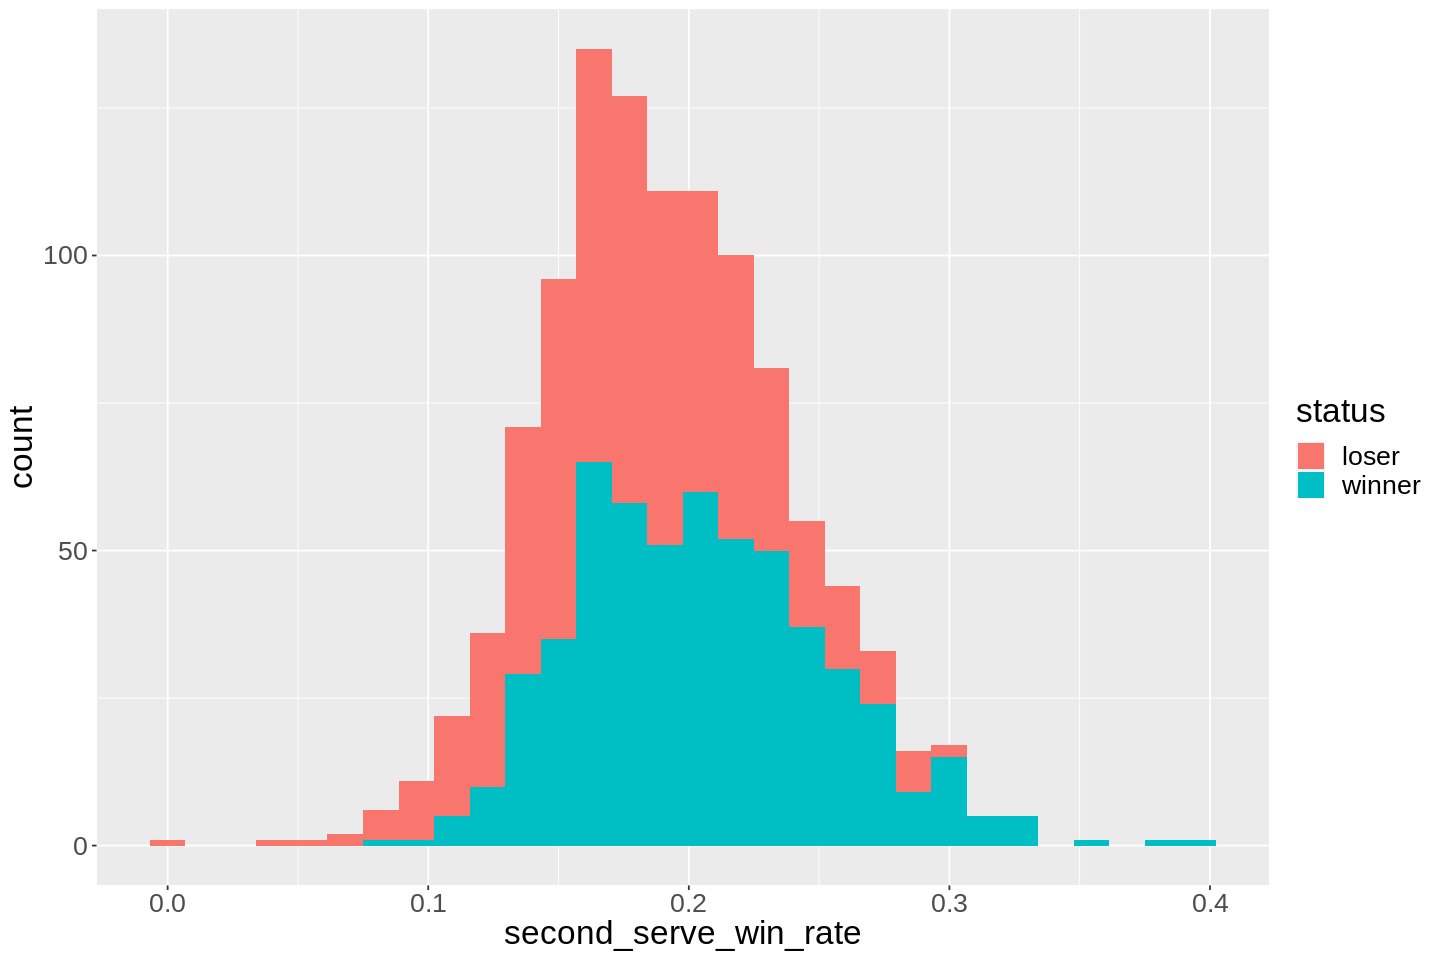

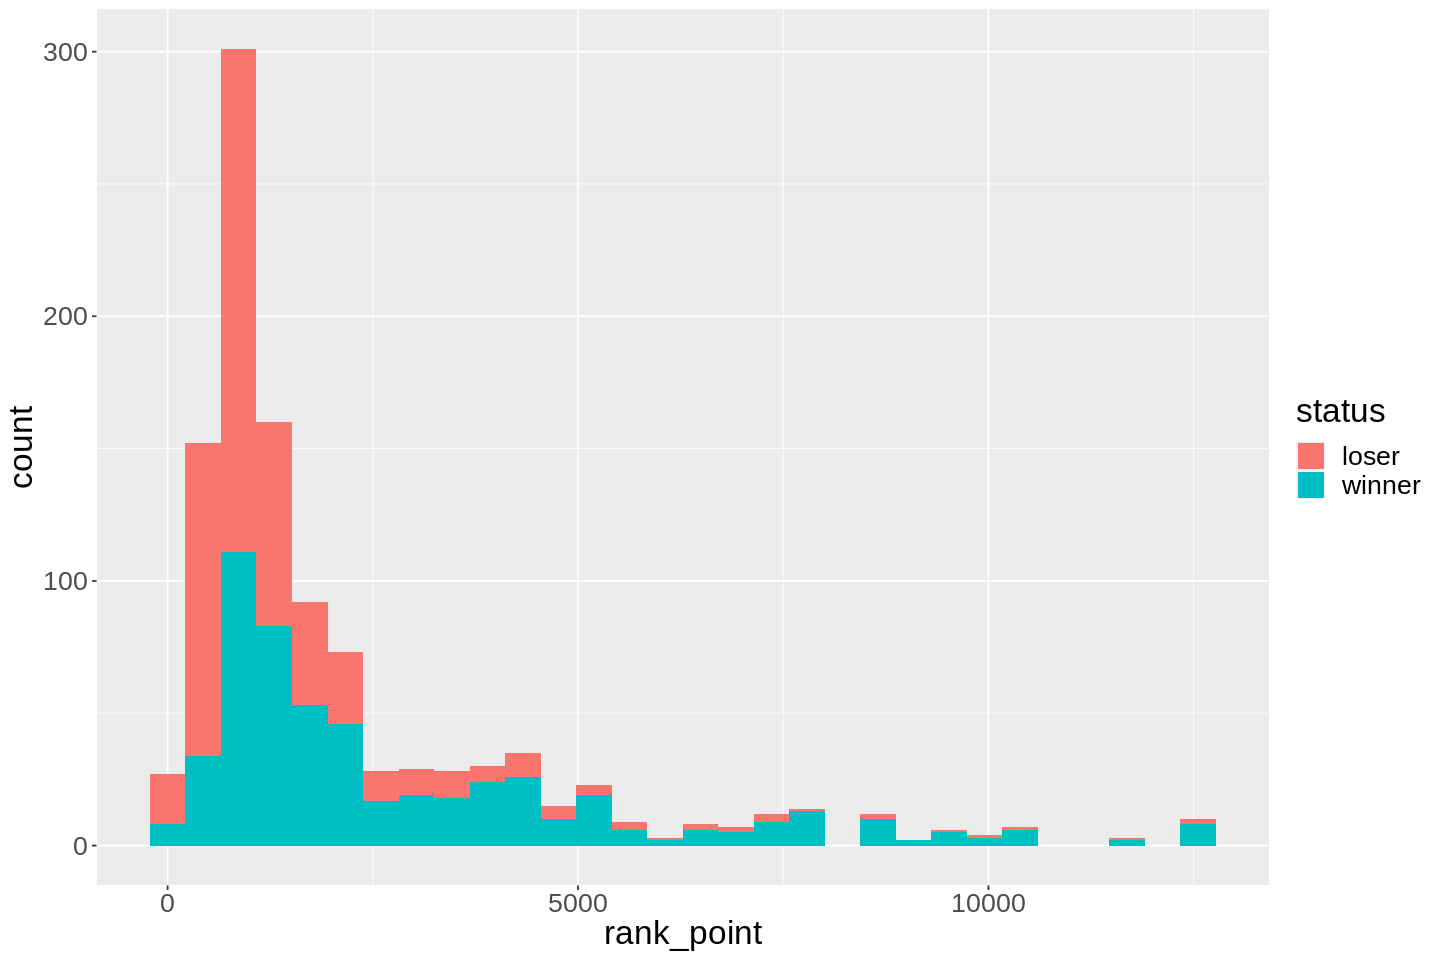

In [10]:
options(repr.plot.width = 12, repr.plot.height = 8) 
ggplot(stat_matter, aes(x = breakpoint_saving_rate , fill = status)) +
    geom_histogram() + 
    theme(text = element_text(size = 20))

ggplot(stat_matter, aes(x = second_serve_win_rate , fill = status)) +
    geom_histogram() + 
    theme(text = element_text(size = 20))

ggplot(stat_matter, aes(x = rank_point , fill = status)) +
    geom_histogram() + 
    theme(text = element_text(size = 20))


In [30]:
# draft predication:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
      set_engine("kknn") %>%
      set_mode("classification")

tennis_recipe <- recipe(status ~ ., data = stat_matter) %>%
                       step_scale(all_predictors()) %>%
                       step_center(all_predictors())

tennis_fit <- workflow() %>%
         add_recipe(tennis_recipe) %>%
         add_model(knn_spec) %>%
         fit(data = stat_matter)

tennis_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~5, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2577982
Best kernel: rectangular
Best k: 5

In [31]:
supper_man <- tibble(rank_point = 1000, 
                     player_age = 30,
                     player_height = 188 ,
                     breakpoint_saving_rate = 0.4,
                     second_serve_win_rate = 0.2,
                     double_fault_rate = 0.0000001,
                     first_serve_win_rate = 0.009)
tennis_predicted <-predict(tennis_fit, supper_man)
tennis_predicted

.pred_class
<fct>
loser


In [34]:
## evaluation
set.seed(1)
tennis_split <- initial_split(stat_matter, prop = 0.75, strata = status)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)

tennis_vfold <- vfold_cv(tennis_train, v = 10, strata = status)
tennis_vfold 

tennis_recipe <- recipe(status ~ ., data = stat_matter) %>%
                       step_scale(all_predictors()) %>%
                       step_center(all_predictors())

tennis_fit <- workflow() %>%
  add_recipe(tennis_recipe) %>%
  add_model(knn_spec) %>%
  fit_resamples(resamples = tennis_vfold)
tennis_fit %>% collect_metrics()

splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,binary,0.7520427,10,0.01560944
roc_auc,binary,0.8278824,10,0.01347222


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.6993902,10,0.01705501,Model01
2,roc_auc,binary,0.7687126,10,0.01753223,Model01
3,accuracy,binary,0.7433232,10,0.01093058,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
14,roc_auc,binary,0.8530363,10,0.01011031,Model13
15,accuracy,binary,0.7800000,10,0.01387746,Model14
15,roc_auc,binary,0.8524926,10,0.01028575,Model14


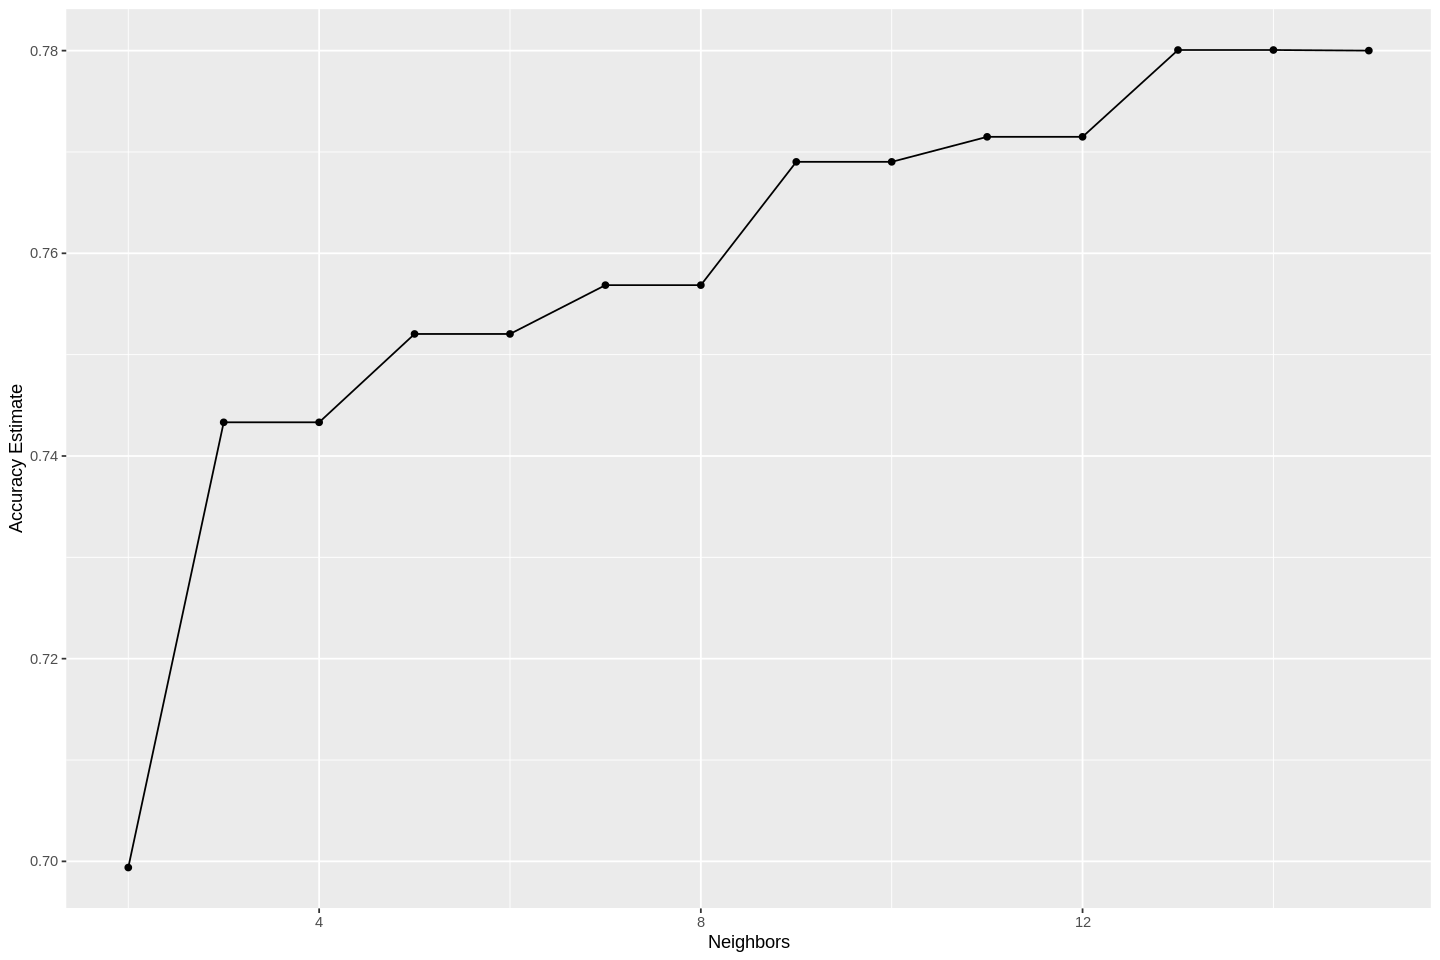

In [41]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")
set.seed(1)
knn_results <- workflow() %>%
  add_recipe(tennis_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = tennis_vfold, grid = 20) %>%
  collect_metrics()
knn_results

accuracies <- knn_results %>%
  filter(.metric == "accuracy")
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")
accuracy_vs_k

## Preliminary exploratory data analysis  
read  
wrangle  
summarize(into at least one table)   
visualize (at least one plot)  

## Method  
1). explain how we will conduct data analysis  
2). describe how we will visualize result

## Expected outcomes and significance  